# Домашнее задание №4

### *Практическое задание:*

1. Попробуйте улучшить точность распознавания образов cifar 10 сверточной нейронной сетью, рассмотренной на уроке. Приложите анализ с описанием того, что улучшает работу нейронной сети, а что ухудшает

In [1]:
from tensorflow import keras 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import os
import matplotlib.pyplot as plt

In [2]:
# установка параметров нейросети
batch_size = 128
num_classes = 10
epochs = 5
data_augmentation = True
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [3]:
# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [4]:
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=0.5)

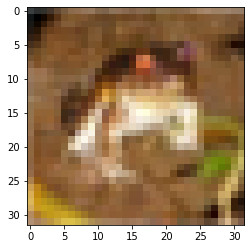

In [5]:
plt.imshow(x_train[0])

In [6]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


In [7]:
# инициализация RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [8]:
# запуск data augmentation через fit_generator
model.fit(datagen.flow(x_train, y_train,
                                  batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    workers=4)

Epoch 1/5
391/391 [==============================] - 111s 279ms/step - loss: 1.9967 - accuracy: 0.2621 - val_loss: 1.7652 - val_accuracy: 0.3725
Epoch 2/5
391/391 [==============================] - 108s 276ms/step - loss: 1.7556 - accuracy: 0.3626 - val_loss: 1.6418 - val_accuracy: 0.4134
Epoch 3/5
391/391 [==============================] - 109s 279ms/step - loss: 1.6501 - accuracy: 0.3971 - val_loss: 1.4980 - val_accuracy: 0.4533
Epoch 4/5
391/391 [==============================] - 108s 276ms/step - loss: 1.5749 - accuracy: 0.4248 - val_loss: 1.4906 - val_accuracy: 0.4638
Epoch 5/5
391/391 [==============================] - 108s 276ms/step - loss: 1.5247 - accuracy: 0.4449 - val_loss: 1.4009 - val_accuracy: 0.4955


In [9]:
# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('сохранить обученную модель как %s ' % model_path)


сохранить обученную модель как C:\Users\Mikhail\1.14_NN_Intro\saved_models\keras_cifar10_trained_model.h5 


In [10]:
# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 6s 21ms/step - loss: 1.4009 - accuracy: 0.4955
Test loss: 1.400942325592041
Test accuracy: 0.49549999833106995


### *Улучшение модели:*

Увеличиваем количество эпох

In [12]:
epochs = 10

Меняем конфигурацию модели

In [13]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [14]:
# инициализация RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [15]:
# запуск data augmentation через fit_generator
model.fit(datagen.flow(x_train, y_train,
                                  batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    workers=4)

Epoch 1/10
391/391 [==============================] - 227s 575ms/step - loss: 1.8443 - accuracy: 0.3303 - val_loss: 1.5971 - val_accuracy: 0.4256
Epoch 2/10
391/391 [==============================] - 229s 584ms/step - loss: 1.5935 - accuracy: 0.4240 - val_loss: 1.4987 - val_accuracy: 0.4651
Epoch 3/10
391/391 [==============================] - 226s 577ms/step - loss: 1.4781 - accuracy: 0.4675 - val_loss: 1.3985 - val_accuracy: 0.4930
Epoch 4/10
391/391 [==============================] - 238s 607ms/step - loss: 1.3838 - accuracy: 0.5080 - val_loss: 1.2110 - val_accuracy: 0.5758
Epoch 5/10
391/391 [==============================] - 242s 619ms/step - loss: 1.3020 - accuracy: 0.5355 - val_loss: 1.2449 - val_accuracy: 0.5608
Epoch 6/10
391/391 [==============================] - 243s 620ms/step - loss: 1.2465 - accuracy: 0.5601 - val_loss: 1.1027 - val_accuracy: 0.6108
Epoch 7/10
391/391 [==============================] - 246s 629ms/step - loss: 1.1909 - accuracy: 0.5800 - val_loss: 1.0871 -

In [17]:
# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 13s 43ms/step - loss: 0.9684 - accuracy: 0.6602
Test loss: 0.9684045910835266
Test accuracy: 0.6601999998092651


In [19]:
print('Baseline Test accuracy: 0.49549999833106995')
print('Test accuracy:', scores[1])

Baseline Test accuracy: 0.49549999833106995
Test accuracy: 0.6601999998092651


#### !!!Результаты модели улучшены!!!

In [21]:
print('-'*100)

----------------------------------------------------------------------------------------------------


2. Опишите в анализе, какие изменения необходимо было бы внести в получившуюся нейронную сеть, если бы ей нужно было работать не с cifar10, а с MNIST, CIFAR100 и IMAGENET

*CIFAR-10*

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

*CIFAR100*

This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).
Here is the list of classes in the CIFAR-100

*MNIST*

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets.  
The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments.  
Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.  

The MNIST database contains 60,000 training images and 10,000 testing images.

*IMAGENET*

The ImageNet dataset contains 14,197,122 annotated images according to the WordNet hierarchy. Since 2010 the dataset is used in the ImageNet Large Scale Visual Recognition Challenge (ILSVRC), a benchmark in image classification and object detection. The publicly released dataset contains a set of manually annotated training images.  
A set of test images is also released, with the manual annotations withheld. ILSVRC annotations fall into one of two categories:  
(1) image-level annotation of a binary label for the presence or absence of an object class in the image, e.g., “there are cars in this image” but “there are no tigers,” and  
(2) object-level annotation of a tight bounding box and class label around an object instance in the image, e.g., “there is a screwdriver centered at position (20,25) with width of 50 pixels and height of 30 pixels”. The ImageNet project does not own the copyright of the images, therefore only thumbnails and URLs of images are provided.

Total number of non-empty WordNet synsets: 21841  
Total number of images: 14197122  
Number of images with bounding box annotations: 1,034,908  
Number of synsets with SIFT features: 1000  
Number of images with SIFT features: 1.2 million  

*Выводы:*

Эти жатасеты отличаются количеством классов, размером картинок, величиной тестовой и тренировочной выборки, а также характеристиками рахметки.  
Все эти отличия должны быть отражены при построение модели конкретного датасета.